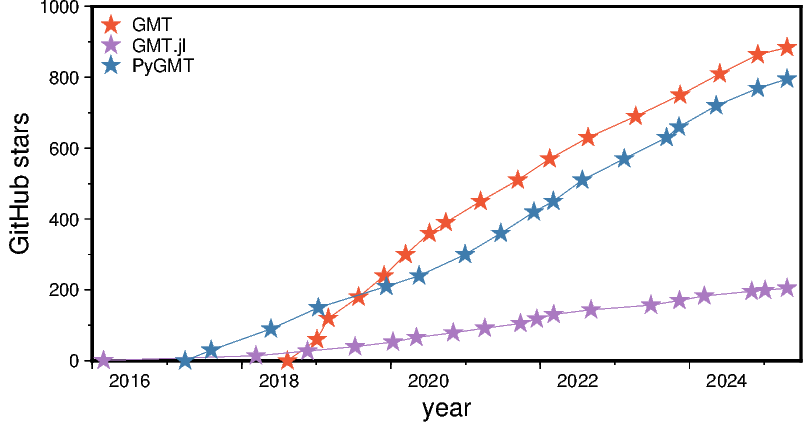

In [1]:
import datetime

import numpy as np
import pygmt

# -----------------------------------------------------------------------------
# Data retrieved from https://star-history.com/#GenericMappingTools/gmt&Date
# last access 2024-12-01
dates_gmt = np.array(
    [
        "2018-08-13",
        "2019-01-04",
        "2019-03-01",
        "2019-07-27",
        "2019-11-29",
        "2020-03-13",
        "2020-07-08",
        "2020-09-26",
        "2021-03-15",
        "2021-09-13",
        "2022-02-16",
        "2022-08-23",
        "2023-04-13",
        "2023-11-17",
        "2024-05-29",
        "2024-12-01",
        "2025-04-23",
    ],
    dtype=np.datetime64,
)
stars_gmt = np.array(
    [0, 60, 120, 180, 240, 300, 360, 390, 450, 510, 570, 630, 690, 750, 810, 864, 884]
)
color_gmt = "238/86/52"  # GMT red

# Data retrieved from https://star-history.com/#GenericMappingTools/GMT.jl&Date
# last access 2025-01-05
dates_jl = np.array(
    [
        "2016-02-25",
        "2018-03-12",
        "2018-11-19",
        "2019-07-10",
        "2020-01-11",
        "2020-05-05",
        "2020-11-01",
        "2021-04-05",
        "2021-09-26",
        "2021-12-15",
        "2022-03-08",
        "2022-09-07",
        "2023-06-27",
        "2023-11-13",
        "2024-03-14",
        "2024-11-01",
        "2025-01-05",
        "2025-04-23",
    ],
    dtype=np.datetime64,
)
stars_jl = np.array(
    [1, 14, 27, 40, 53, 66, 79, 92, 105, 118, 131, 144, 157, 170, 183, 196, 199, 205]
)
color_jl = "170/121/193"  # Julia purple

# Data retrieved from https://star-history.com/#GenericMappingTools/pygmt&Date
# last access 2024-12-01
dates_py = np.array(
    [
        "2017-03-30",
        "2017-08-05",
        "2018-05-24",
        "2019-01-11",
        "2019-12-10",
        "2020-05-18",
        "2020-12-29",
        "2021-06-22",
        "2021-12-01",
        "2022-03-06",
        "2022-07-26",
        "2023-02-16",
        "2023-09-11",
        "2023-11-11",
        "2024-05-11",
        "2024-12-01",
        "2025-04-23",
    ],
    dtype=np.datetime64,
)
stars_py = np.array(
    [0, 30, 90, 150, 210, 240, 300, 360, 420, 450, 510, 570, 630, 660, 720, 769, 795]
)
color_py = "63/124/173"  # Python blue


# -----------------------------------------------------------------------------
fig = pygmt.Figure()
fig.basemap(
    projection="X12c/6c",
    region=[datetime.date(2016, 1, 1), datetime.date(2025, 6, 30), 0, 1000],
    frame=["x+lyear", "y+lGitHub stars"],
)

args_dots = {"style": "c0.2c", "no_clip": True}
args_dots = {"style": "a0.35c", "no_clip": True}

fig.plot(x=dates_gmt, y=stars_gmt, pen=color_gmt, no_clip=True)
fig.plot(x=dates_gmt, y=stars_gmt, fill=color_gmt, label="GMT", **args_dots)

fig.plot(x=dates_jl, y=stars_jl, pen=color_jl, no_clip=True)
fig.plot(x=dates_jl, y=stars_jl, fill=color_jl, label="GMT.jl", **args_dots)

fig.plot(x=dates_py, y=stars_py, pen=color_py, no_clip=True)
fig.plot(x=dates_py, y=stars_py, fill=color_py, label="PyGMT", **args_dots)

fig.legend(position="jLT")
fig.show(dpi=150)

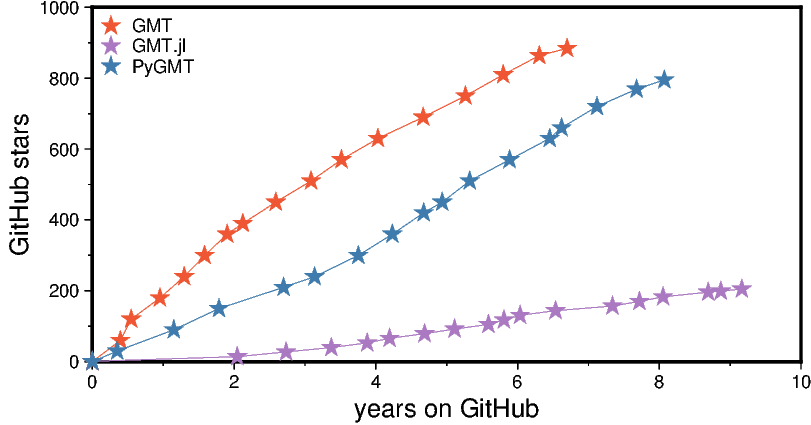

In [2]:
# -----------------------------------------------------------------------------
# Temporal alignment

Ddates_pyjl = dates_py[0] - dates_jl[0]  # Julia first on GitHub -> use as reference zero
Ddates_gmtjl = dates_gmt[0] - dates_jl[0]

dates_py_offset = dates_py - Ddates_pyjl
dates_gmt_offset = dates_gmt - Ddates_gmtjl

dates_jl_zero_days = dates_jl - dates_jl[0]
dates_py_zero_days = dates_py_offset - dates_jl[0]
dates_gmt_zero_days = dates_gmt_offset - dates_jl[0]

dates_jl_zero_years = dates_jl_zero_days.astype(float) / 365  # otherwise only int years
dates_py_zero_years = dates_py_zero_days.astype(float) / 365  # no consideration of Schaltjahr
dates_gmt_zero_years = dates_gmt_zero_days.astype(float) / 365


# -----------------------------------------------------------------------------
fig = pygmt.Figure()
fig.basemap(
    projection="X12c/6c",
    # region=[0, 3700, 0, 1000],
    # frame=["x+lDays", "y+lGitHub stars"],
    region=[0, 10, 0, 1000],
    frame=["x+lyears on GitHub", "y+lGitHub stars"],
)

args_dots = {"style": "c0.2c", "no_clip": True}
args_dots = {"style": "a0.35c", "no_clip": True}

fig.plot(x=dates_gmt_zero_years, y=stars_gmt, pen=color_gmt, no_clip=True)
fig.plot(x=dates_gmt_zero_years, y=stars_gmt, fill=color_gmt, label="GMT", **args_dots)

fig.plot(x=dates_jl_zero_years, y=stars_jl, pen=color_jl, no_clip=True)
fig.plot(x=dates_jl_zero_years, y=stars_jl, fill=color_jl, label="GMT.jl", **args_dots)

fig.plot(x=dates_py_zero_years, y=stars_py, pen=color_py, no_clip=True)
fig.plot(x=dates_py_zero_years, y=stars_py, fill=color_py, label="PyGMT", **args_dots)

fig.legend(position="jLT")
fig.show(dpi=150)